# This notebook analyses 'Alice in Wonderland' book using the following:
    1) Calculate word frequency for each chapter
    2) Text sumamrization for each chapter
    3) Topic modelling for each chapter
    4) Sentiment analysis: (a) as a time-line throughout the book, (b) top sentiment category per person
    5) Find persons and their relationsips
    6) Find top adjectives per person
    7) Extract n-grams for chapters
    8) Text classification using zero-shot learning
   
    
    

# Import libraries

In [2]:
import numpy as np #  for linear algebra
import requests #  for HTTP requests to load data from URL

import re #  for regular expressions

#  for doing NLP stuff such as tokenizing, removing stop words, extracting ngrams and stemming
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams

from textblob import TextBlob #  for sentiment analysis


import spacy #  for using NLP purposes such as NER
nlp = spacy.load("en_core_web_sm") #  use this language model

#  for using gensim library function to summarize text and to do topic modelling using LDA 
from gensim.summarization import summarize
from gensim.corpora import Dictionary
from gensim.models import LdaModel


from collections import Counter #  for sorting words based on their occurrence
from collections import defaultdict

import csv #  for saving data as a table to a csv
import pandas as pd # for using dataframes


import tensorflow as tf  # for using language models
from transformers import pipeline #  for using huggingface pipelines for text summarization
from bertopic import BERTopic #  for topic modelling

# for plottinf word clouds
from wordcloud import WordCloud

#  for visualisation purposes
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx  #  for graph visualisation



nltk.download('punkt') #  sentence tokenizer 
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))




ModuleNotFoundError: No module named 'textblob'

# A function to clean text  
I have decided to keep dots to preserve the sentence information. Also, I have decided not to do stemming or lemmatization in order to keep the context information and for visualisation purposes. I am not removing stop words here either because I want to keep as much as information for text summarization. I will remove stop words down below when necessary (i.e. for topic modelling)

In [2]:
def clean_text(text):
    
    "Given a string, clean it, remove punctuations, unwanted characters, spaces, etc."
        
    #  remove punctuation except dot to keep sentence information     
    text = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-/:;<=>?@[\\]^_`{|}~“…”’'), ' ', text)
    
    #  remove digits
    text = re.sub(r'\d+', ' ', text)
    
    #  remove continous new line
    text = re.sub(r'\n+', ' ', text)

    # Remove unusual characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
         
#     #  remove stop words
#     words = text.split()
#     words = [word for word in words if word not in stop_words]
#     text = " ".join(words)

    # Stem the words
#     words = text.split()
#     words = [stemmer.stem(word) for word in words]
#     text = " ".join(words)

    
    return text


# Load the data

In [3]:
no_chapters = 13 # give this manually, or we could just count number of 'CHAPTER' occurrences after 'Contents' word

# keep each chapter and their corresponding text together and in a dictionary named chapters, doing this for an easy access
chapters = dict(zip(range(1, no_chapters), ['' for i in range(no_chapters)]))
#  start from 1 as we have chapters starting from 1


#  load data from URL
url = "https://www.gutenberg.org/files/11/11-0.txt"
text = requests.get(url).text

texts = text.split("CHAPTER")[1:no_chapters] #  skip part after last CHAPTER as we don't need it

#  put every chapter into chapters dictionary item
for i, chapter in enumerate(texts): 
    chapters[i+1] = clean_text(chapter.split("\n", 1)[1].strip())


# Calculate word frequency

In [1]:
# store information
word_counts = []
for chapter_no, chapter_text in chapters.items(): #  traverse 
    
    words = chapter_text.split() #  word segmentation
    word_count = Counter(words) #  count frequency for each unique word
    
    for word, count in word_count.items(): #  keep chapter_no and corresponding words and their freqs
        word_counts.append([chapter_no, word, count])
        
        
# convert word_counts list to a df for better visualisation purposes
df = pd.DataFrame(word_counts, columns=["chapter_no", "word", "word_count"])

#  print df
print(df.head(20))


# write df into a csv file
with open("word_counts_per_chapter.csv", "w", newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["chapter_no", "word", "word_count"])
    writer.writerows(word_counts)

NameError: name 'chapters' is not defined

# Text summarization

# Text summarization using gensim

In [12]:
#  text summarization using gensim
for chapter_no, chapter_text in chapters.items():

    summary = summarize(chapter_text,  ratio=0.1) #  keep 0.1 percent of text 
    
    print("CHAPTER {} summary START ---- \n\n\n".format(chapter_no))
    print(summary)
    print("\n\nCHAPTER {} summary END ---- \n\n\n".format(chapter_no))


CHAPTER 1 summary START ---- 



down the rabbit hole alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought alice without pictures or conversations so she was considering in her own mind as well as she could for the hot day made her feel very sleepy and stupid whether the pleasure of making a daisy chain would be worth the trouble of getting up and picking the daisies when suddenly a white rabbit with pink eyes ran close by her.
there was nothing so very remarkable in that nor did alice think it so very much out of the way to hear the rabbit say to itself oh dear oh dear i shall be late when she thought it over afterwards it occurred to her that she ought to have wondered at this but at the time it all seemed quite natural but when the rabbit actually took a watch out of its waistcoat pocke

CHAPTER 5 summary START ---- 



well perhaps you havent found it so yet said alice but when you have to turn into a chrysalisyou will some day you knowand then after that into a butterfly i should think youll feel it a little queer wont you not a bit said the caterpillar.
for some minutes it puffed away without speaking but at last it unfolded its arms took the hookah out of its mouth again and said so you think youre changed do you im afraid i am sir said alice i cant remember things as i usedand i dont keep the same size for ten minutes together cant remember what things said the caterpillar.
you are old said the youth one would hardly suppose that your eye was as steady as ever yet you balanced an eel on the end of your nose what made you so awfully clever i have answered three questions and that is enough said his father dont give yourself airs do you think i can listen all day to such stuff be off or ill kick you down stairs that is not said right said the caterpillar.
and now wh

CHAPTER 10 summary START ---- 



at last the mock turtle recovered his voice and with tears running down his cheeks he went on again you may not have lived much under the sea i havent said alice and perhaps you were never even introduced to a lobster alice began to say i once tasted but checked herself hastily and said no never so you can have no idea what a delightful thing a lobster quadrille is no indeed said alice.
what sort of a dance is it why said the gryphon you first form into a line along the sea shore two lines cried the mock turtle.
of course the mock turtle said advance twice set to partners change lobsters and retire in same order continued the gryphon.
then you know the mock turtle went on you throw the the lobsters shouted the gryphon with a bound into the air.
back to land again and thats all the first figure said the mock turtle suddenly dropping his voice and the two creatures who had been jumping about like mad things all this time sat down again very sadly and qui

# Text summarization using language models

In [19]:
# text summarization using bart language model and huggingface pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

 # chapter_text[:4000 --? I do truncate as language model has a limit on the num of tokens it can process
#  text summarization using gensim
for chapter_no, chapter_text in chapters.items():

    output = summarizer(chapter_text[:4000], max_length=300, min_length=200, length_penalty=3.0, num_beams=5)[0]['summary_text']
    
    print("CHAPTER {} summary START ---- \n\n\n".format(chapter_no))
    print(output)
    print("\n\nCHAPTER {} summary END ---- \n\n\n".format(chapter_no))


CHAPTER 1 summary START ---- 



Alice fell down a rabbit hole after a white rabbit with pink eyes. She had never before seen a rabbit with either a waistcoat pocket or a watch to take out of it and burning with curiosity she ran after it. The rabbit hole went straight on like a tunnel for some way and then dipped suddenly down so suddenly that alice had not a moment to think about stopping herself before she found herself falling down a very deep well. She took down a jar from one of the shelves as she passed it was labelled orange marmalade but to her great disappointment it was empty. She did not like to drop the jar for fear of killing somebody underneath so managed to put it into a cupboard as she fell past it. down down down. would the fall never come to an end i wonder how many miles ive fallen by this time she said aloud. i must be getting somewhere near the centre of the earth. let me see that would be four thousand miles down i think. i shall have to ask them what the name of

CHAPTER 9 summary START ---- 



 alice was very glad to find her in such a pleasant temper and thought to herself that perhaps it was only the pepper that had made her so savage when they met in the kitchen. when im a duchess she said to herself not in a very hopeful tone though i wont have any pepper in my kitchen at all . soup does very well withoutmaybe its always pepper that makes people hot tempered she went on very much pleased at having found out a new kind of rule. everythings got a moral if only you can find it. and she squeezed herself up closer to alices side as she spoke. i make you a present of everything ive said as yet. a cheap sort of present thought alice. i only wish people knew that then they wouldnt be so stingy about it. you know she had quite forgotten the duc Duchess by this time and was a little startled when she heard her voice close to her ear. youre thinking about something my dear and that makes you forget to talk. i cant tell you just now what the moral of

# Topic Modelling

('alice', 'way', 'think', 'little', 'one', 'rabbit', 'went', 'found', 'key', 'nothing', 'well', 'see', 'like', 'said', 'get', 'say', 'door', 'time', 'thought', 'either')
('little', 'alice', 'going', 'like', 'said', 'time', 'one', 'see', 'never', 'thought', 'would', 'wonder', 'nothing', 'well', 'rabbit', 'could', 'much', 'either', 'think', 'went')
('alice', 'could', 'little', 'see', 'tried', 'like', 'would', 'get', 'thought', 'door', 'wonder', 'rabbit', 'time', 'say', 'much', 'think', 'either', 'well', 'use', 'found')


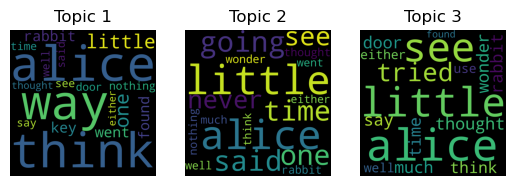

('little', 'im', 'dear', 'alice', 'said', 'go', 'things', 'must', 'oh', 'went', 'let', 'thought', 'feet', 'see', 'would', 'poor', 'tears', 'time', 'wont', 'great')
('alice', 'pool', 'could', 'feet', 'went', 'like', 'tears', 'go', 'one', 'mouse', 'way', 'im', 'great', 'oh', 'quite', 'swam', 'little', 'began', 'time', 'cried')
('mouse', 'alice', 'way', 'cried', 'cats', 'thought', 'like', 'said', 'began', 'must', 'one', 'poor', 'swam', 'would', 'quite', 'little', 'oh', 'pool', 'wont', 'let')


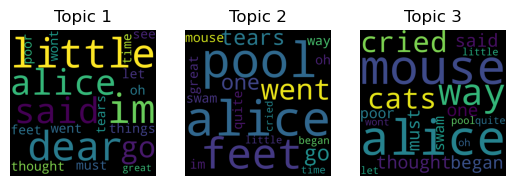

('course', 'said', 'dodo', 'must', 'mouse', 'know', 'round', 'one', 'alice', 'race', 'dry', 'soon', 'thing', 'long', 'lory', 'birds', 'would', 'quite')
('alice', 'said', 'mouse', 'know', 'would', 'lory', 'long', 'must', 'one', 'race', 'soon', 'quite', 'dry', 'dodo', 'round', 'thing', 'course', 'birds')
('said', 'alice', 'dodo', 'mouse', 'soon', 'thing', 'birds', 'round', 'dry', 'one', 'race', 'quite', 'know', 'long', 'course', 'lory', 'must', 'would')


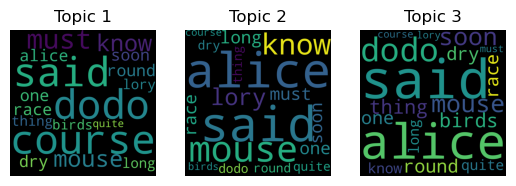

('alice', 'one', 'bill', 'little', 'like', 'thought', 'sure', 'last', 'im', 'got', 'put', 'made', 'could', 'said', 'good', 'large', 'time', 'see', 'another', 'much')
('little', 'alice', 'said', 'rabbit', 'house', 'door', 'fan', 'great', 'heard', 'window', 'ill', 'gloves', 'bottle', 'something', 'thought', 'went', 'found', 'time', 'get', 'began')
('alice', 'quite', 'little', 'room', 'moment', 'get', 'rabbit', 'ran', 'one', 'sort', 'came', 'grow', 'thing', 'said', 'went', 'heard', 'sure', 'window', 'next', 'made')


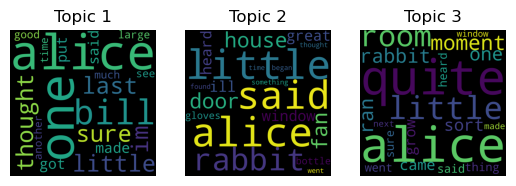

('said', 'alice', 'im', 'little', 'caterpillar', 'serpent', 'last', 'one', 'think', 'got', 'know', 'dont', 'pigeon', 'come', 'never', 'bit', 'well', 'size', 'right', 'day')
('alice', 'caterpillar', 'ive', 'im', 'said', 'pigeon', 'replied', 'youre', 'back', 'well', 'little', 'serpent', 'like', 'know', 'think', 'time', 'see', 'day', 'mouth', 'good')
('said', 'caterpillar', 'pigeon', 'good', 'time', 'well', 'bit', 'tone', 'right', 'size', 'little', 'thought', 'im', 'see', 'got', 'mouth', 'one', 'dont', 'ive', 'serpent')


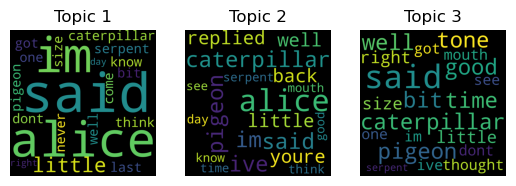

('said', 'alice', 'like', 'little', 'cat', 'mad', 'see', 'thought', 'duchess', 'much', 'went', 'would', 'dont', 'baby', 'footman', 'im', 'quite', 'thing', 'two', 'large')
('alice', 'said', 'pig', 'door', 'get', 'footman', 'large', 'would', 'felt', 'could', 'way', 'know', 'duchess', 'one', 'sitting', 'oh', 'think', 'go', 'first', 'mad')
('said', 'cat', 'alice', 'duchess', 'much', 'baby', 'know', 'well', 'right', 'footman', 'cook', 'went', 'could', 'thought', 'way', 'tone', 'get', 'youre', 'quite', 'sitting')


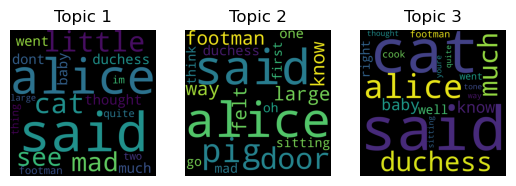

('said', 'alice', 'hatter', 'dormouse', 'know', 'well', 'thing', 'one', 'went', 'dont', 'think', 'little', 'say', 'tea', 'time', 'like', 'could', 'mean', 'eyes', 'march')
('alice', 'time', 'said', 'dormouse', 'go', 'hatter', 'one', 'head', 'great', 'first', 'table', 'little', 'tea', 'say', 'took', 'replied', 'well', 'march', 'hare', 'know')
('hare', 'march', 'said', 'alice', 'dormouse', 'tea', 'went', 'hatter', 'asleep', 'replied', 'say', 'like', 'mean', 'thing', 'little', 'well', 'think', 'took', 'one', 'head')


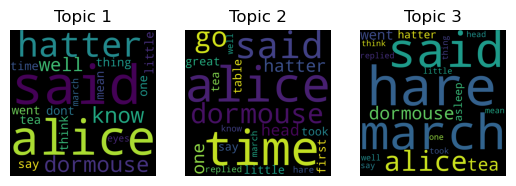

('soldiers', 'two', 'came', 'alice', 'began', 'went', 'minute', 'one', 'thought', 'queen', 'looking', 'rabbit', 'like', 'three', 'head', 'away', 'game', 'back', 'said', 'executioner')
('said', 'alice', 'queen', 'king', 'cat', 'looked', 'three', 'dont', 'like', 'look', 'see', 'began', 'voice', 'got', 'gardeners', 'went', 'five', 'would', 'game', 'going')
('head', 'alice', 'could', 'queen', 'time', 'said', 'tree', 'round', 'one', 'see', 'going', 'queens', 'went', 'three', 'looking', 'upon', 'gardeners', 'five', 'dont', 'minute')


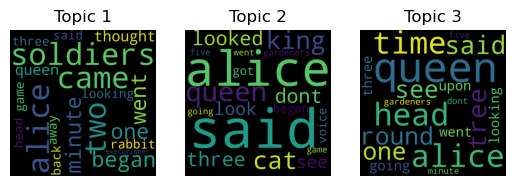

('said', 'turtle', 'mock', 'gryphon', 'alice', 'went', 'little', 'tone', 'never', 'come', 'could', 'know', 'thought', 'duchess', 'dont', 'say', 'much', 'day', 'well', 'course')
('alice', 'said', 'queen', 'dont', 'turtle', 'mock', 'day', 'duchess', 'say', 'know', 'never', 'moral', 'well', 'course', 'gryphon', 'heard', 'like', 'old', 'went', 'thing')
('said', 'duchess', 'quite', 'alice', 'like', 'little', 'alices', 'moral', 'much', 'thing', 'queen', 'thought', 'heard', 'old', 'mock', 'say', 'know', 'never', 'come', 'gryphon')


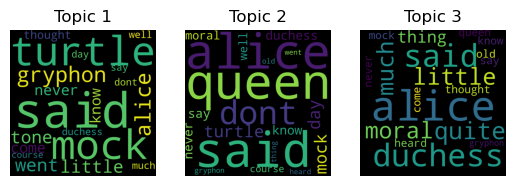

('turtle', 'mock', 'gryphon', 'said', 'lobster', 'would', 'first', 'two', 'cried', 'got', 'repeat', 'alice', 'voice', 'like', 'sea', 'went', 'began', 'course', 'replied', 'could')
('gryphon', 'said', 'alice', 'know', 'lobsters', 'voice', 'go', 'dance', 'come', 'whiting', 'join', 'replied', 'mock', 'went', 'repeat', 'turtle', 'first', 'time', 'sea', 'would')
('said', 'alice', 'turtle', 'mock', 'would', 'dance', 'join', 'could', 'like', 'whiting', 'sea', 'little', 'tone', 'course', 'began', 'voice', 'replied', 'time', 'back', 'know')


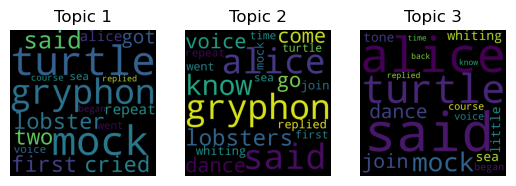

('king', 'one', 'alice', 'hatter', 'court', 'began', 'bread', 'butter', 'jury', 'poor', 'said', 'im', 'rabbit', 'white', 'well', 'dormouse', 'added', 'see', 'read', 'voice')
('said', 'hatter', 'dormouse', 'king', 'queen', 'court', 'one', 'im', 'added', 'well', 'march', 'poor', 'voice', 'jury', 'made', 'witness', 'began', 'butter', 'bread', 'great')
('said', 'alice', 'king', 'witness', 'rabbit', 'thought', 'next', 'white', 'court', 'quite', 'read', 'began', 'see', 'great', 'march', 'made', 'dormouse', 'voice', 'im', 'hatter')


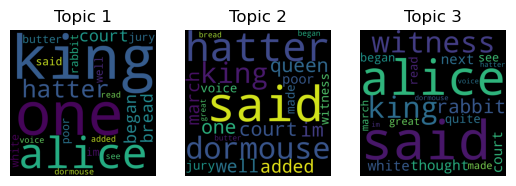

('project', 'gutenberg', 'tm', 'said', 'work', 'works', 'electronic', 'king', 'terms', 'foundation', 'license', 'alice', 'full', 'jury', 'literary', 'archive', 'use', 'trademark', 'agreement', 'must')
('gutenberg', 'work', 'project', 'works', 'copyright', 'electronic', 'said', 'donations', 'may', 'must', 'tm', 'agreement', 'without', 'alice', 'states', 'united', 'u', 'written', 'nothing', 'section')
('e', 'would', 'f', 'laws', 'foundation', 'little', "'s", 'states', 'see', 'united', 'copyright', 'one', 'found', 'www', 'head', 'state', 'agreement', 'work', 'voice', 'writing')


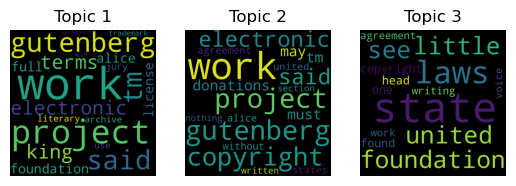

In [115]:
#  let's visualise top 3 topics
num_topics = 3
    
    
# using LDAvis
for chapter_no, chapter_text in chapters.items():
    
    text_data = chapter_text.split('.') #  sentence segmentation 
    # each sentence in a chapter will be treated as a document
     
    #  tokenize text data
    tokenized_docs = [word_tokenize(doc) for doc in text_data]

    # filter noise
    # Remove stop words from the tokenized documents
    filtered_docs = []
    for doc in tokenized_docs:
        filtered_docs.append([word for word in doc if word.lower() not in stop_words])

    #  construct a dictionary
    dictionary = Dictionary(filtered_docs)

    # filter uncommon and very common words based on thresholds
    dictionary.filter_extremes(no_below=5, no_above=0.6)
    
    #  construct features based on bow
    bow_corpus = [dictionary.doc2bow(doc) for doc in filtered_docs]

    #  construct ldamodel
    lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary)

    top_topics = lda_model.top_topics(bow_corpus)
    
   
    # visualisation using word clouds
    words = []
    fig, axes = plt.subplots(1, num_topics)
    
    for i, topic in enumerate(top_topics): 
        
        weights, words = zip(*topic[0]) #  unzip topic
        
        print(words)

        wordcloud = WordCloud(width=2000, height = 2000).generate(" ".join(words))
        axes[i].imshow(wordcloud)
        axes[i].axis("off")
        axes[i].set_title(f"Topic {i + 1}")

    plt.show()



# N-gram analysis

CHAPTER 1 N-GRAMS 





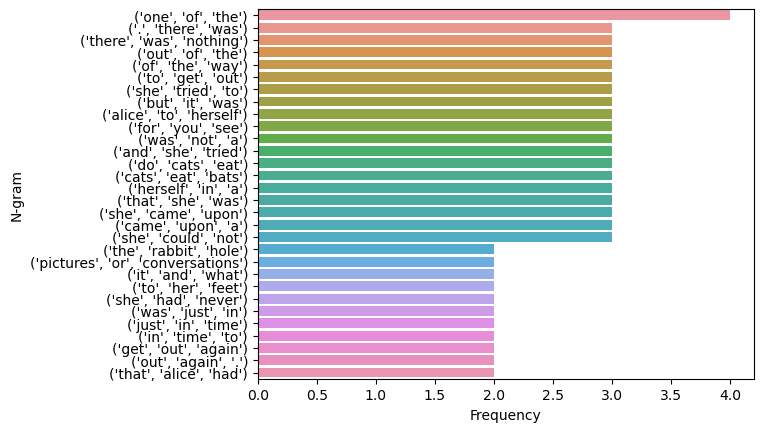

CHAPTER 2 N-GRAMS 





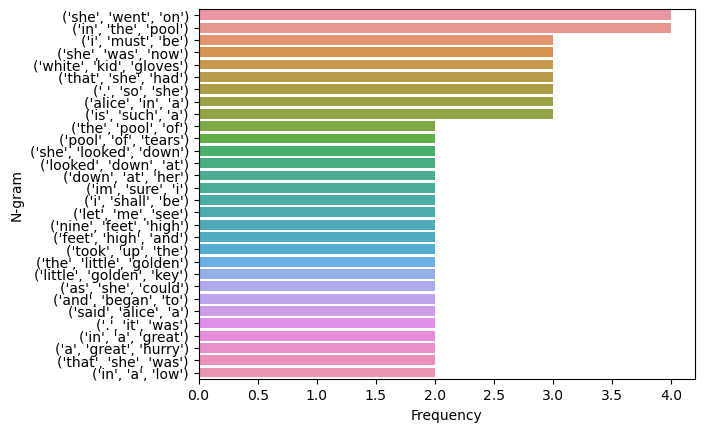

CHAPTER 3 N-GRAMS 





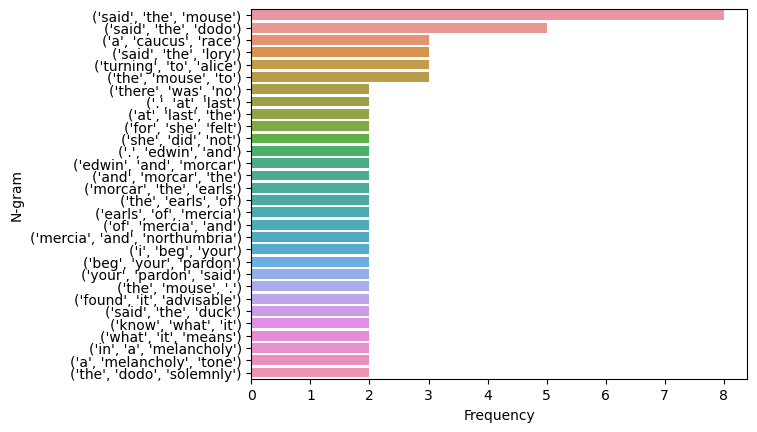

CHAPTER 4 N-GRAMS 





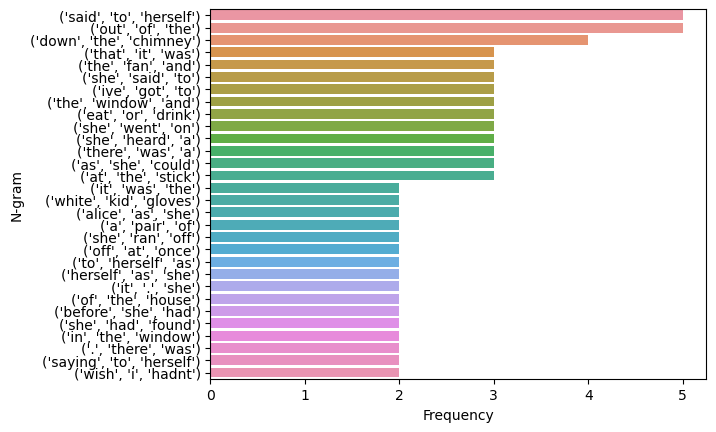

CHAPTER 5 N-GRAMS 





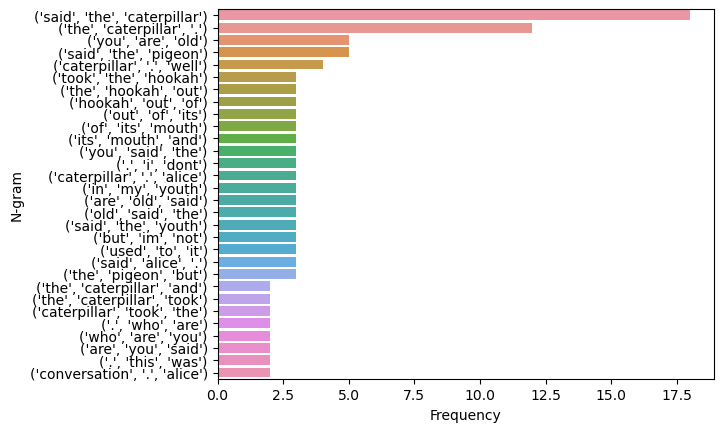

CHAPTER 6 N-GRAMS 





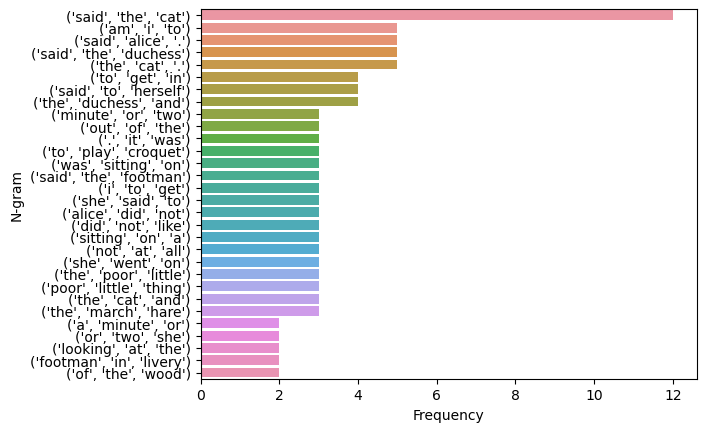

CHAPTER 7 N-GRAMS 





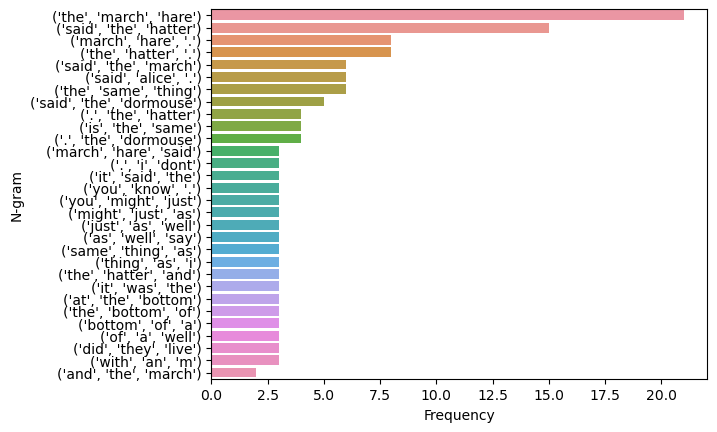

CHAPTER 8 N-GRAMS 





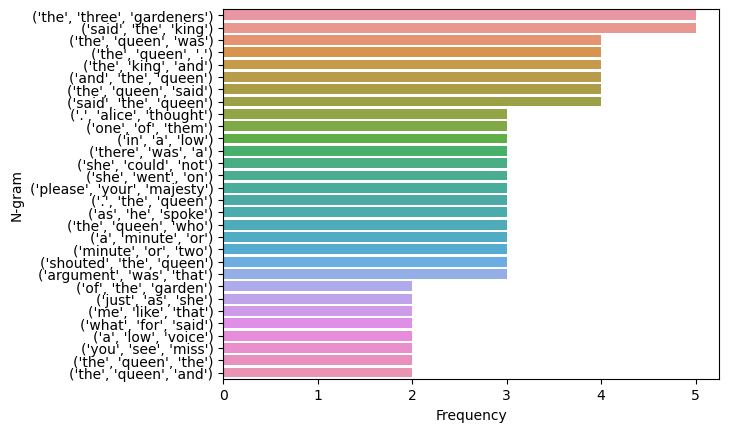

CHAPTER 9 N-GRAMS 





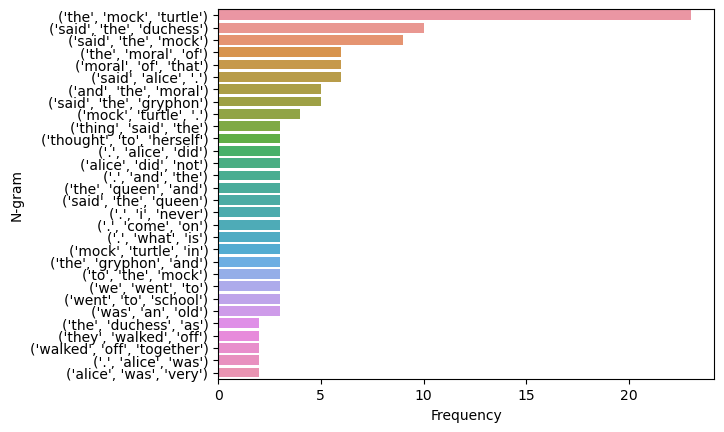

CHAPTER 10 N-GRAMS 





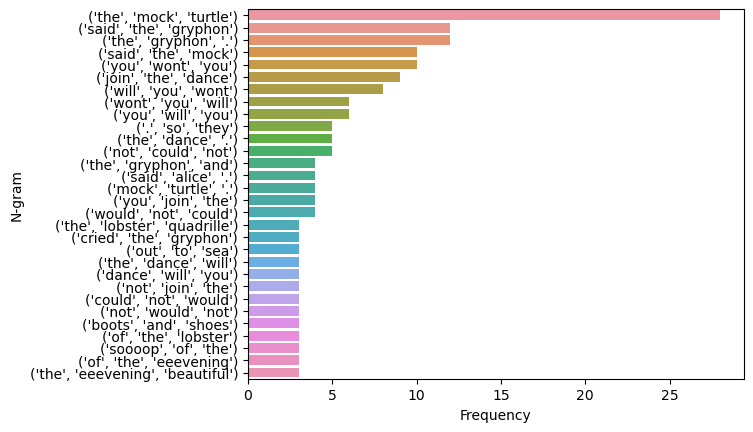

CHAPTER 11 N-GRAMS 





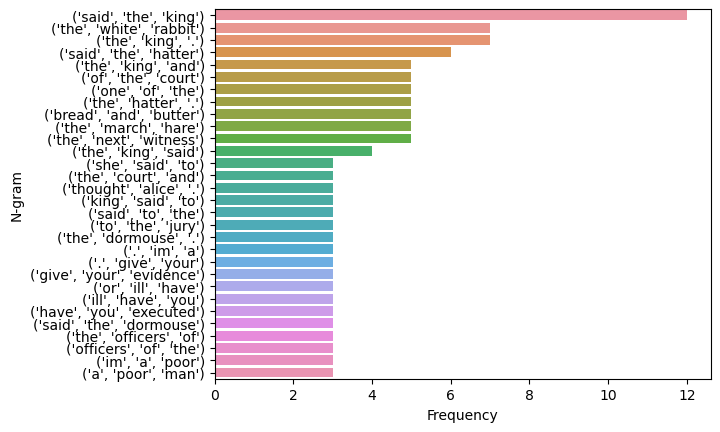

CHAPTER 12 N-GRAMS 





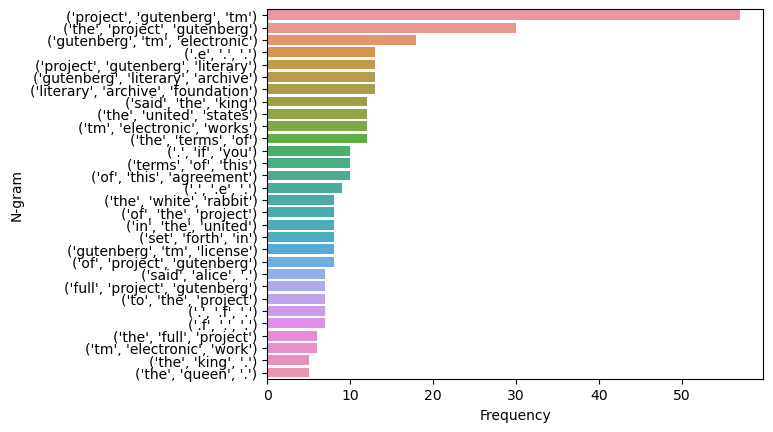

In [49]:
#  check frequency of n-grams

ngram_num = 3 # will only do 3-grams
top_n = 30 # visualise top 30 n-grams


for chapter_no, chapter_text in chapters.items():
    
    print("CHAPTER {} N-GRAMS \n\n\n".format(chapter_no))
    
    tokens = nltk.word_tokenize(chapter_text)
    ngrams = nltk.ngrams(tokens, ngram_num)
    ngram_frequency = dict(Counter(ngrams))
 
    #   sort ngrams based on their frequency
    sorted_ngrams = sorted(ngram_frequency.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(sorted_ngrams, columns=["N-gram", "Frequency"])

    sns.barplot(x="Frequency", y="N-gram", data=df.iloc[:top_n])
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

# Sentiment analysis throughout the book

In [2]:
import numpy as np
np.min(smoothed_sentiment_scores)

NameError: name 'smoothed_sentiment_scores' is not defined

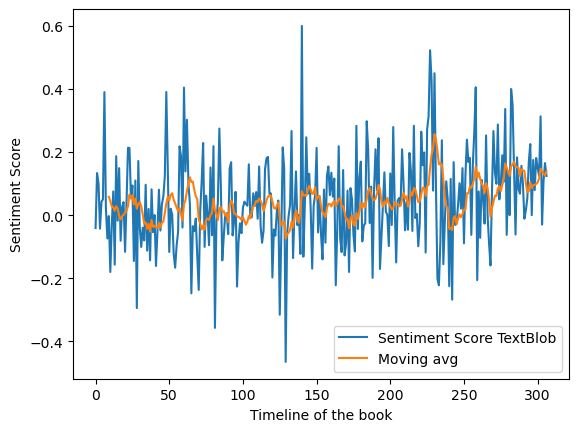

In [100]:
#  plot sentiment scores as a time-series throughout the book

all_book = " ".join(chapters.values()) #  join all chapters together

#  we will divide the text into chunks to represent as time-series and for better sentiment analysis
chunk_size = 500 #  token size
chunks = [all_book[i:i+chunk_size] for i in range(0, len(all_book), chunk_size)]

# Calculate sentiment score for each chunk using TextBlob
sentiment_scores = [TextBlob(chunk).sentiment.polarity for chunk in chunks]

# Find rolling average for better visualisation
window_size = 10 # window size for rolling
smoothed_sentiment_scores = pd.Series(sentiment_scores).rolling(window_size).mean()

# Plot the sentiment scores over time
plt.plot(sentiment_scores, label="Sentiment Score TextBlob")
plt.plot(smoothed_sentiment_scores, label="Moving avg")
plt.xlabel("Timeline of the book")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()

# Extract characters and places in the book

In [56]:
for chapter_no, chapter_text in chapters.items():
    
    print("CHAPTER {} \n\n\n".format(chapter_no))
    
    
    doc = nlp(chapter_text) #  spacy doc to extract NERs

    characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    place_names = [ent.text for ent in doc.ents if ent.label_ == "GPE"]


    print("Chracters:", set(characters))
    print("Places:", place_names)
    
    print('----')

CHAPTER 1 



Chracters: {'dinahll', 'dinah', 'alice'}
Places: ['new zealand', 'australia', 'turkey']
----
CHAPTER 2 



Chracters: {'ma', 'alice hastily', 'cat dinah', 'alice', 'hearthrug', 'william'}
Places: ['london', 'paris', 'paris', 'rome']
----
CHAPTER 3 



Chracters: {'mercia', 'ma', 'northumbria ugh', 'edgar', 'ahem', 'williams', 'alice aloud', 'alice', 'william', 'edwin', 'william the conqueror', 'mouse', 'dinah'}
Places: ['mercia', 'northumbria', 'stigand']
----
CHAPTER 4 



Chracters: {'alice heard', 'mary ann mary ann', 'mary ann', 'alice', 'alice come', 'dinah'}
Places: ['dinah']
----
CHAPTER 5 



Chracters: {'alice felt', 'alice hastily', 'alice crouched', 'alice', 'william'}
Places: ['lefthand']
----
CHAPTER 6 



Chracters: {'alice seriously', 'alice', 'footman', 'fish footman'}
Places: ['saucepan', 'lefthand']
----
CHAPTER 7 



Chracters: {'alice felt', 'riddles', 'alice'}
Places: []
----
CHAPTER 8 



Chracters: {'queens', 'hedgehogs', 'cook', 'alice'}
Places: ['

# Strongest sentiment per character

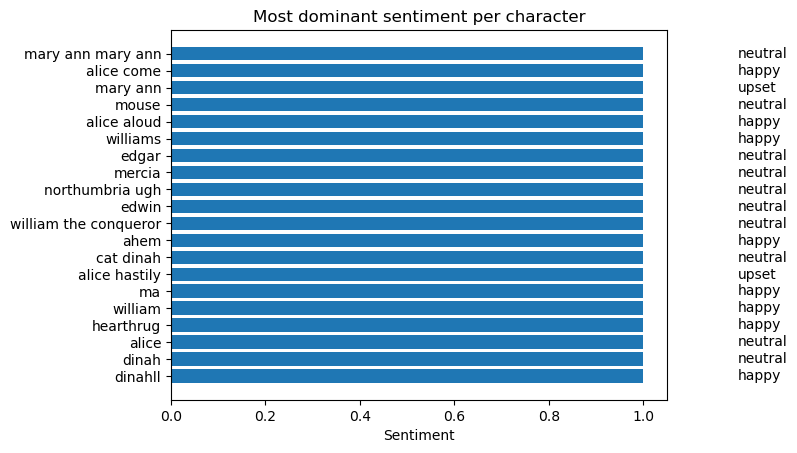

In [101]:
doc = nlp(all_book) #  spacy doc to extract NERs

characters = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]


# Split the text into sentences
sentences = [sent.text for sent in doc.sents]


sentiment_labels = [] #  keep sentiment types  for each sentence

for sentence in sentences:
    sentiment = TextBlob(sentence).sentiment.polarity 
    
    if sentiment < 0:
        sentiment_labels.append("upset")
    elif sentiment > 0:
        sentiment_labels.append("happy")
    else:
        sentiment_labels.append("neutral")
        
    


# Associate the sentiment scores with the named entities
sentiment_by_person = {}
for person in characters:
    for i, sentence in enumerate(sentences):
        if person in sentence:
            sentiment = sentiment_labels[i]
            if person in sentiment_by_person:
                sentiment_by_person[person].append(sentiment)
            else:
                sentiment_by_person[person] = [sentiment]

result = {}
for name, words in sentiment_by_person.items():
    frequency = defaultdict(int)
    for word in words:
        frequency[word] += 1
        result[name] = max(frequency, key=frequency.get)


num_characters = 20
names = list(result.keys())[:num_characters]
words = list(result.values())[:num_characters]

plt.barh(names, [1]*len(names))
for i, word in enumerate(words):
    plt.text(1.2, i, word, va='center')


plt.yticks(range(len(names)), names)
plt.xlabel('Sentiment')
plt.title('Most dominant sentiment per character')
plt.show()
  


# Find top ADJ for each character

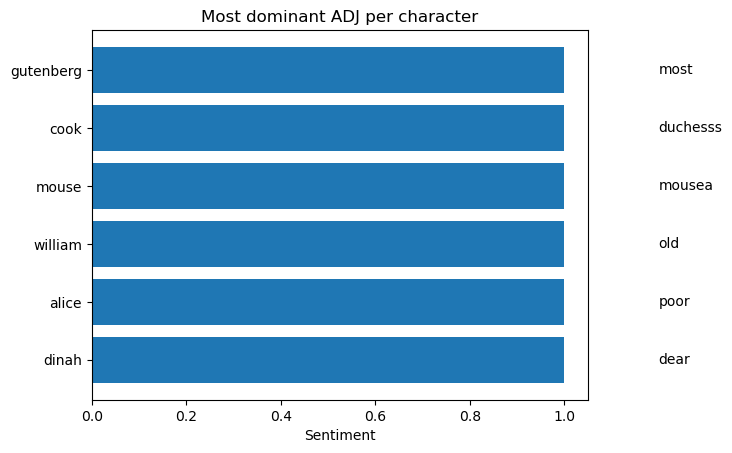

In [90]:
    
# Compute the adverbs used by each person
character_adj = defaultdict(list)

for person in characters:
    for token in doc:
        if token.text == person:
            for child in token.children:
                if child.pos_ == "ADJ":
                    character_adj[person].append(child.text)

result = {}
for name, words in character_adj.items():
    frequency = defaultdict(int)
    
    for word in words:
        frequency[word] += 1
        result[name] = max(frequency, key=frequency.get)


names = list(result.keys())
words = list(result.values())



plt.barh(names, [1]*len(names))
for i, word in enumerate(words):
    plt.text(1.2, i, word, va='center')


plt.yticks(range(len(names)), names)
plt.xlabel('Sentiment')
plt.title('Most dominant ADJ per character')
plt.show()

    
    

# Find relationships between characters

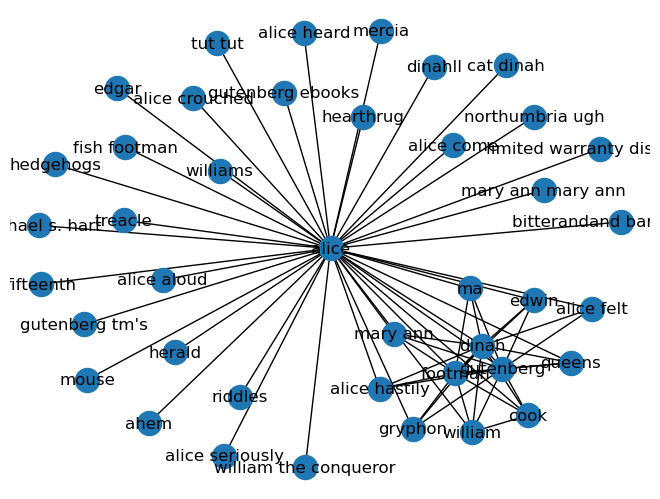

In [78]:
G = nx.Graph()# initialize relationship graph


for ent in doc.ents: #  add each person as a node to the graph
    if ent.label_ == "PERSON":
        G.add_node(ent.text, type='person')


#  minimum number of co-occurrences
threshold = 10 #  if two people appear together apart at least 10 times, then put an edge between their nodes

#  adding edges
pairs = {}
for i, entity1 in enumerate(doc.ents):
    if entity1.label_ != "PERSON": #  find the person person entity
        continue #  look for it until a person entity is found
    for entity2 in doc.ents[i+1:]: #  skip the person himself/herself
        if entity2.label_ == "PERSON": #  find the second person entity
            if (entity1.text, entity2.text) in pairs:
                pairs[(entity1.text, entity2.text)] += 1
            else:
                pairs[(entity1.text, entity2.text)] = 1

for person1, person2 in pairs:
    if person_pairs[(person1, person2)] >= threshold:
        G.add_edge(person1, person2)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()


# Text Classification using Perform Zero-shot learning 

In [123]:
classifier = pipeline("zero-shot-classification") #  initialize the model

candidate_labels = ["fantasy", "drama", "adventure", "comedy"] #  give hand-crafted categories which are appropriate

# text classification for each text chunk
predicted_labels = [classifier(chunk, candidate_labels) for chunk in chunks]


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


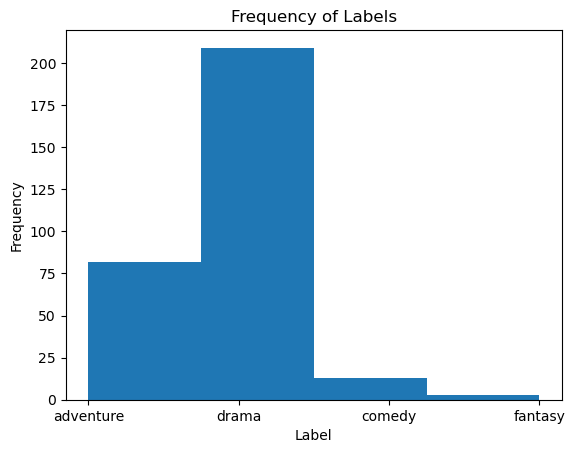

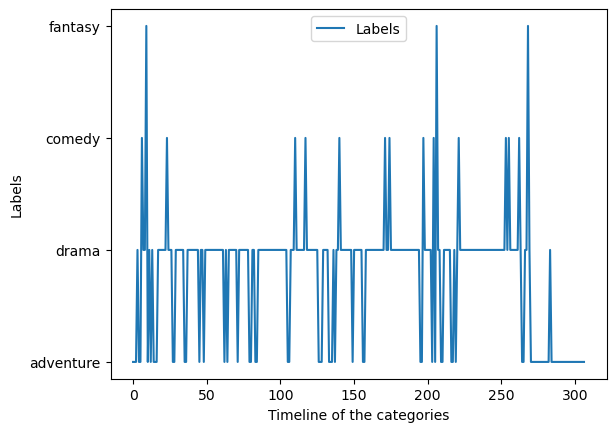

In [137]:
#  take the labels for each text chunk and visualise and see the change


labels = [item['labels'][item['scores'].index(max(item['scores']))] for item in predicted_labels]

# show histogram
plt.hist(labels, bins=len(set(labels)))

plt.title("Frequency of Labels")
plt.xlabel("Label")
plt.ylabel("Frequency")

# Show the plot
plt.show()


# Plot the labels over time
plt.plot(labels_list, label="Labels")
plt.xlabel("Timeline of the categories")
plt.ylabel("Labels")
plt.legend()
plt.show()

# Future Work

    1) Investigate language models for sentiment analysis
    2) Investigate BERTopic for topic modelling 
